In [1]:
import ultralytics
from ultralytics import YOLO
import cv2
import gdown
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir("../")

In [4]:
model = YOLO('yolov9c-seg.pt') 

In [9]:
train_mask_image_path = "data/train/mask"
train_original_image_path = "data/train/original"
train_label_path = "data/train/labels"

test_mask_image_path = "data/test/mask"
test_original_image_path = "data/test/original"
test_label_path = "data/test/labels"
os.makedirs(train_label_path, exist_ok=True)
os.makedirs(test_label_path, exist_ok=True)

In [56]:
def change_extension(input_path, output_dir=None, old_ext = 'a', new_ext='b'):
    """
    Đổi phần mở rộng của tệp từ 'a' sang 'b'.
    
    Args:
        input_path (str): Đường dẫn đến tệp hoặc thư mục đầu vào.
        output_dir (str, optional): Đường dẫn đến thư mục đầu ra. Nếu None, lưu tại vị trí gốc.
        old_ext (str): Đuôi cũ (mặc định là 'a')
        new_ext (str): Phần mở rộng mới (mặc định là 'b').
    
    Returns:
        list: Danh sách các tệp đã được đổi đuôi.
    """
    changed_files = []
    
    # Nếu input_path là thư mục
    if os.path.isdir(input_path):
        for filename in os.listdir(input_path):
            if filename.lower().endswith(f'{old_ext}'):  # Kiểm tra đuôi 'a'
                old_file_path = os.path.join(input_path, filename)
                # Tạo tên tệp mới bằng cách thay '.a' thành '.b'
                new_filename = filename.replace(f'{old_ext}', f'.{new_ext}')
                if output_dir:
                    new_file_path = os.path.join(output_dir, new_filename)
                else:
                    new_file_path = os.path.join(input_path, new_filename)
                
                # Sao chép hoặc đổi tên tệp
                os.rename(old_file_path, new_file_path)
                changed_files.append(new_file_path)
    
    # Nếu input_path là tệp
    elif os.path.isfile(input_path) and input_path.lower().endswith(f'{old_ext}'):
        if output_dir:
            new_filename = os.path.basename(input_path).replace(f'{old_ext}', f'.{new_ext}')
            new_file_path = os.path.join(output_dir, new_filename)
        else:
            new_file_path = input_path.replace(f'{old_ext}', f'.{new_ext}')
        
        os.rename(input_path, new_file_path)
        changed_files.append(new_file_path)
    
    else:
        print(f"Đường dẫn {input_path} không phải là tệp hoặc thư mục hợp lệ với đuôi '.a'")
    
    return changed_files

In [69]:
change_extension(train_original_image_path, None, '.jpg', 'png')
change_extension(test_original_image_path, None, '.jpg', 'png')


[]

In [70]:
def mask_to_yolo(mask_path, output_path, image_width, image_height):
    # Đọc mặt nạ
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise FileNotFoundError(f"Không tìm thấy mặt nạ: {mask_path}")
    
    # Nhị phân hóa
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    
    # Tìm đường viền
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Ghi chú thích
    with open(output_path, 'w') as f:
        for contour in contours:
            epsilon = 0.001 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            approx = approx.flatten().astype(np.float32)
            approx[::2] /= image_width   # Chuẩn hóa x
            approx[1::2] /= image_height # Chuẩn hóa y
            if len(approx) >= 6:  # Đảm bảo có ít nhất 3 điểm
                f.write(f"0 {' '.join(map(str, approx))}\n")

In [72]:
for img_name in os.listdir(train_original_image_path):
    train_img_path = os.path.join(train_original_image_path, img_name)
    train_mask_path = os.path.join(train_mask_image_path, img_name.replace('.jpg', '.png'))
    train_label_file_path = os.path.join(train_label_path, img_name.replace('.png' or 'jpg', '.txt')) 
    
    train_img = cv2.imread(train_img_path)
    h_train, w_train = train_img.shape[:2]

    mask_to_yolo(train_mask_path, train_label_file_path, w_train, h_train)

    
for img_name in os.listdir(test_original_image_path):
    
    test_img_path = os.path.join(test_original_image_path, img_name)
    test_mask_path = os.path.join(test_mask_image_path, img_name.replace('.jpg', '.png'))
    test_label_file_path = os.path.join(test_label_path, img_name.replace('.png' or 'jpg', '.txt')) 
    
    test_img = cv2.imread(test_img_path)
    h_test, w_test = test_img.shape[:2]
    
    mask_to_yolo(test_mask_path, test_label_file_path, w_test, h_test)
    

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

libpng warning: iCCP: known incorrect sRGB profile


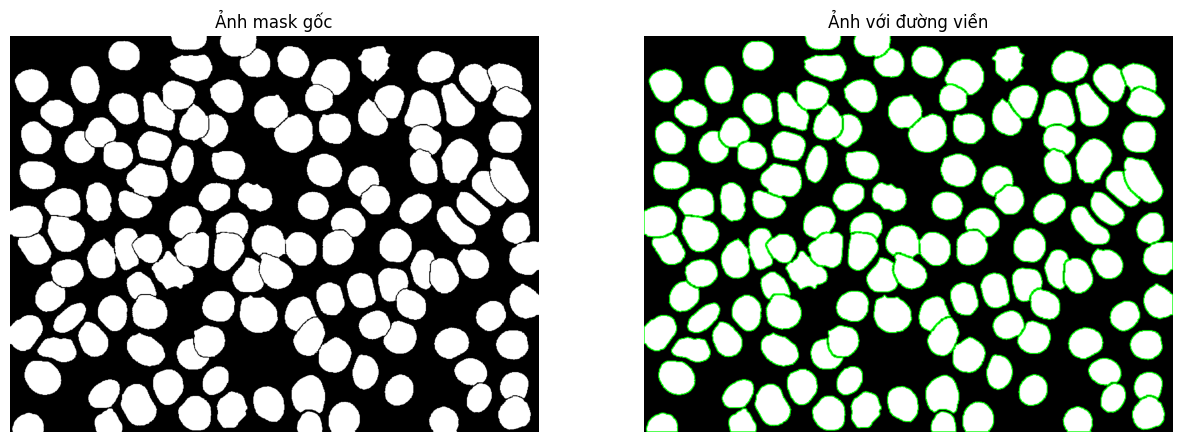

In [76]:
def draw_polygons(image_path, label_path):
    # Đọc ảnh gốc
    original_image = cv2.imread(image_path)
    image = original_image.copy()

    if image is None:
        print(f"Không tìm thấy ảnh: {image_path}")
        return
    
    # Lấy kích thước ảnh
    height, width = image.shape[:2]
    
    # Đọc tệp chú thích
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    # Xử lý từng dòng chú thích
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 3:  # Cần ít nhất class_id và 2 điểm
            continue
        
        # Lấy class_id và tọa độ
        class_id = int(parts[0])
        points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
        
        # Chuyển đổi tọa độ chuẩn hóa thành pixel
        points[:, 0] *= width  # Nhân x với chiều rộng
        points[:, 1] *= height  # Nhân y với chiều cao
        points = points.astype(np.int32)
        
        # Vẽ đường viền lên ảnh 
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    
    # Hiển thị ảnh
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_without_polygons_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 1 hàng, 2 cột
    
    ax1.imshow(image_without_polygons_rgb)
    ax1.axis('off')
    ax1.set_title("Ảnh mask gốc")
    
    ax2.imshow(image_rgb)
    ax2.axis('off')
    ax2.set_title("Ảnh với đường viền")
    
    plt.show()


image_path = "data/train/mask/0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png"
label_path = "data/train/labels/0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.txt"
draw_polygons(image_path, label_path)

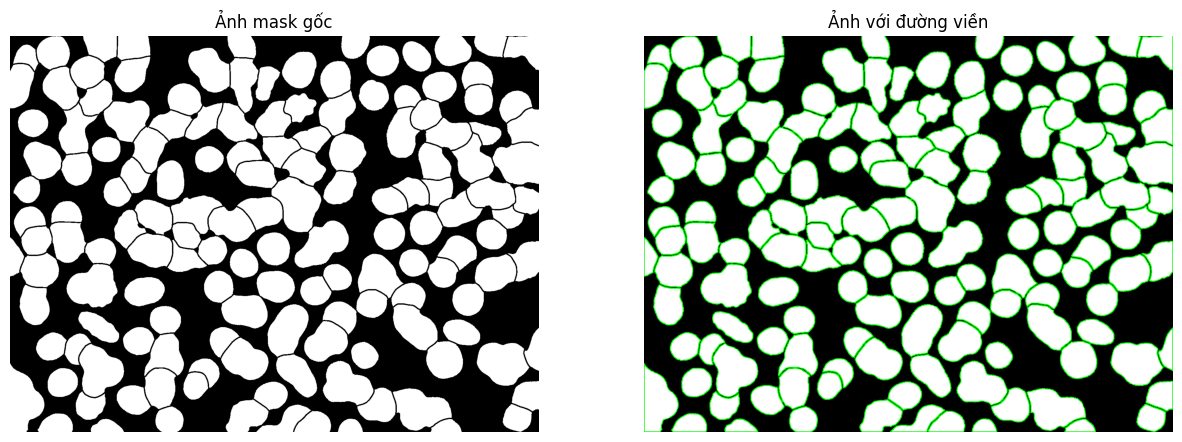

: 

In [ ]:
image_path = "data/test/mask/e4eea7ea-8989-46a9-9c98-25a178146b28.png"
label_path = "data/test/labels/e4eea7ea-8989-46a9-9c98-25a178146b28.txt"
draw_polygons(image_path, label_path)

In [26]:
import os
import shutil
import random

val_original_path = 'data/validation/original' 
val_mask_path = 'data/validation/mask'        
val_label_path = 'data/validation/labels'

# Tạo thư mục validation nếu chưa tồn tại
os.makedirs(val_original_path, exist_ok=True)
os.makedirs(val_mask_path, exist_ok=True)
os.makedirs(val_label_path, exist_ok=True)

In [20]:
files = [f for f in os.listdir(train_original_image_path)]
random.shuffle(files)

In [21]:
val_size = int(len(files) * 0.2)

val_files = files[:val_size]
train_files = files[val_size:]

In [22]:
for file in val_files:
    original_file_path = os.path.join(train_original_image_path, file)
    val_file_path = os.path.join(val_original_path, file)
    
    shutil.move(original_file_path, val_file_path)
    print(f"Di chuyển ảnh: {original_file_path} -> {val_file_path}")
    
    # Di chuyển mặt nạ (giả sử tên tệp mặt nạ tương ứng)
    mask_file = file.rsplit('.', 1)[0] + '.png'  # Thay '.jpg' hoặc '.png' bằng '.png'
    orig_mask_path = os.path.join(train_mask_path, mask_file)
    val_mask_path_full = os.path.join(val_mask_path, mask_file)
    
    if os.path.exists(orig_mask_path):
        shutil.move(orig_mask_path, val_mask_path_full)
        print(f"Di chuyển mặt nạ: {orig_mask_path} -> {val_mask_path_full}")
    else:
        print(f"Không tìm thấy mặt nạ: {orig_mask_path}, bỏ qua")    

Di chuyển ảnh: data/train/original/dd944a6b-c1d3-4f9f-bbdc-3709707984f7.png -> data/validation/original/dd944a6b-c1d3-4f9f-bbdc-3709707984f7.png
Di chuyển mặt nạ: data/train/mask/dd944a6b-c1d3-4f9f-bbdc-3709707984f7.png -> data/validation/mask/dd944a6b-c1d3-4f9f-bbdc-3709707984f7.png
Di chuyển ảnh: data/train/original/7e25ced3-5caf-47f8-ad0c-42946bd4468b.png -> data/validation/original/7e25ced3-5caf-47f8-ad0c-42946bd4468b.png
Di chuyển mặt nạ: data/train/mask/7e25ced3-5caf-47f8-ad0c-42946bd4468b.png -> data/validation/mask/7e25ced3-5caf-47f8-ad0c-42946bd4468b.png
Di chuyển ảnh: data/train/original/161978c3-3a05-47a5-9fee-be7d25693eae.png -> data/validation/original/161978c3-3a05-47a5-9fee-be7d25693eae.png
Di chuyển mặt nạ: data/train/mask/161978c3-3a05-47a5-9fee-be7d25693eae.png -> data/validation/mask/161978c3-3a05-47a5-9fee-be7d25693eae.png
Di chuyển ảnh: data/train/original/2fdbd9bc-bbaf-44c2-b40c-d193709639fa.png -> data/validation/original/2fdbd9bc-bbaf-44c2-b40c-d193709639fa.png


In [23]:
remaining_train_files = os.listdir(train_original_image_path)
print(f"Số tệp còn lại trong train/original: {len(remaining_train_files)}")
print(f"Danh sách tệp trong train/original: {remaining_train_files}")

Số tệp còn lại trong train/original: 936
Danh sách tệp trong train/original: ['027ab174-e47a-44f8-b85b-372449eeb7d8.png', 'b1145408-feae-4637-b4cf-3e70b99cc62d.png', 'a11ed7d0-12f6-468f-abad-5cba7d968123.png', '415409ac-97b3-4cd9-b203-11ef00662352.png', 'cc453255-b583-425e-bc3e-284ccf120944.png', '84041bf9-dace-4066-9fe0-52170d08f826.png', 'c147584d-4c61-412a-bdaf-b02b22c18708.png', '834a30bb-26bf-4e60-9ea1-3250b926892e.png', 'c4d34e35-4db2-41de-ba77-1a94aa9ef788.png', 'a6ba808f-ec60-42a5-ad91-7b32412ab708.png', '397f37bc-a3a4-4257-9430-c8fc5716f8b1.png', '7029feb3-9ffe-46e4-9883-6a9df84f7b62.png', '351d6536-3a5c-46eb-a6e4-d71dd999908a.png', '393df10a-5d64-476b-88f5-14ac56d6ed60.png', 'ab27173b-6e30-4957-bd68-29194328fd39.png', 'db3f4098-02e4-45a3-a7af-5dda37ac1526.png', '030f3421-ed3f-4bf1-8f27-4d02590bffbc.png', '5893e081-04f2-4e33-9851-bed5f0e4d333.png', 'bb137718-20ba-457d-8ffe-4f9420ecaab6.png', '99a21c5c-f5a7-4c07-9cb6-5dda2d388f48.png', '883b726a-f61c-4382-9f1b-2fff302beba6.png'

In [28]:
print(len(os.listdir(val_original_path)))
print(len(os.listdir(val_mask_path)))
print(len(os.listdir(val_label_path)))

233
233
233
